In [1]:
# імпортуємо потрібні бібліотеки для візуалізації та розрахунків
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [2]:
os.chdir('C:\\Users\\Лара\\Desktop\\MO\\')

In [3]:
#читаємо csv-файл та виводимо перші 5 стрічок
dt = pd.read_csv('Dataset.csv', sep=",", header = 0, index_col = False)
dt.head()

,attributes,period,data,gryvnya_dolar
0,Вінницька,2005,12193,510
1,Волинська,2005,6808,510
2,Дніпропетровська,2005,31344,510
3,Донецька,2005,40753,510
4,Житомирська,2005,9418,510


# Описова статистика

In [4]:
# виведемо статистичні дані 
dt[['data','gryvnya_dolar']].describe()

,data,gryvnya_dolar
count,375.000000,375.000000
mean,61859.050667,1338.800000
std,71060.249606,893.529862
min,5776.000000,505.000000
25%,22432.500000,535.000000
50%,39861.000000,799.000000
75%,72506.500000,2580.000000
max,675427.000000,2720.000000


array([[<AxesSubplot:title={'center':'data'}>,
        <AxesSubplot:title={'center':'gryvnya_dolar'}>]], dtype=object)

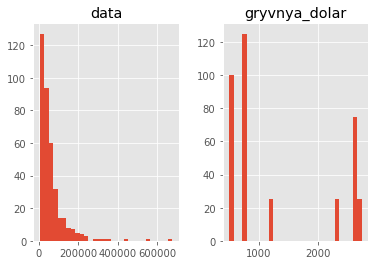

In [5]:
# побудуємо гістограми
dt[['data','gryvnya_dolar']].hist(bins=30)

array([[<AxesSubplot:title={'center':'data'}>,
        <AxesSubplot:title={'center':'gryvnya_dolar'}>]], dtype=object)

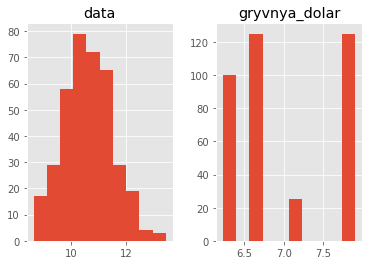

In [6]:
# гістограми даних після логарифмування
np.log(dt[['data','gryvnya_dolar']]).hist()

In [7]:
# імпортуємо gaussian_kde для ядерної оцінки плотності
from scipy.stats.kde import gaussian_kde

from numpy import linspace,hstack
from pylab import plot,show,hist

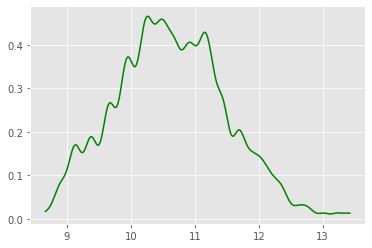

In [8]:
my_density = gaussian_kde(np.log(dt['data']), bw_method = 0.1)

#график
x = linspace(min(np.log(dt['data'])), max(np.log(dt['data'])), 1000)
plot(x, my_density(x), 'g')

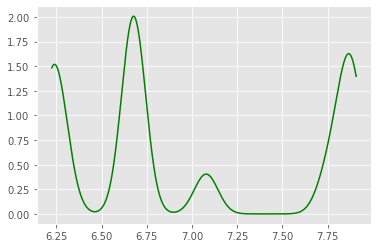

In [9]:
my_density = gaussian_kde(np.log(dt['gryvnya_dolar']), bw_method = 0.1)

#график
x = linspace(min(np.log(dt['gryvnya_dolar'])), max(np.log(dt['gryvnya_dolar'])), 1000)
plot(x, my_density(x), 'g')

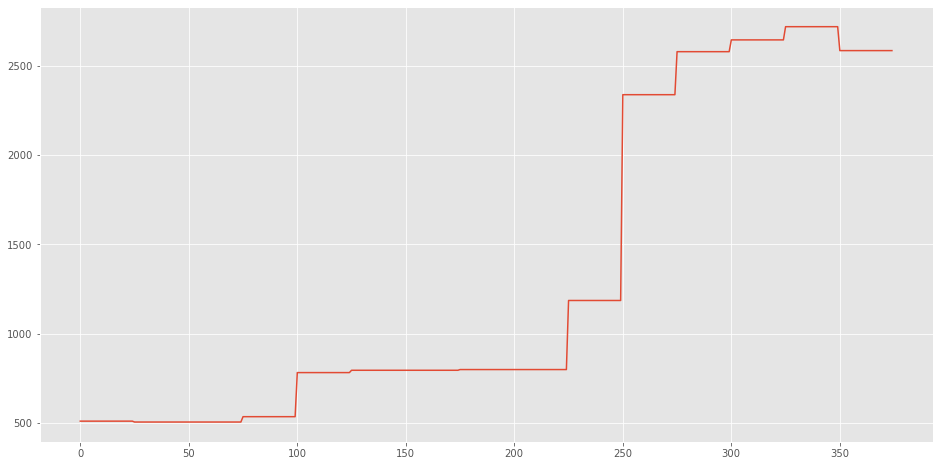

In [10]:
dt1 = dt['gryvnya_dolar']
plt.figure(figsize=(16,8))
dt1.plot()
plt.show()

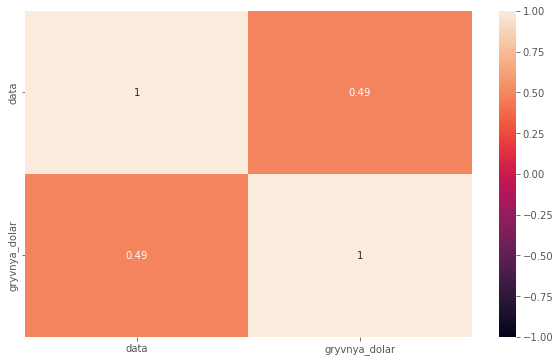

In [11]:
#теплова карта кореляцією
from scipy import stats
import seaborn as sns
import math
dt_corr = dt[['data','gryvnya_dolar']].corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(dt_corr, annot = True, vmin = -1, vmax = 1)
bottom, top = ax.get_ylim()

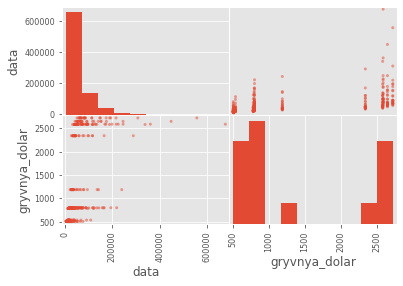

In [12]:
#матриця
from pandas.plotting import scatter_matrix
scatter_matrix(dt[['data','gryvnya_dolar']]);

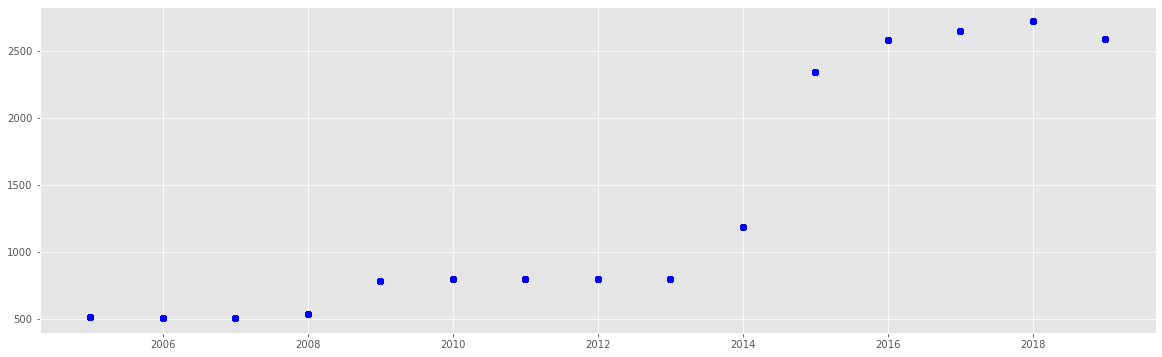

In [13]:
plt.figure(figsize=(20,6))
plt.scatter(dt.period,dt.gryvnya_dolar, color = 'blue')

<Figure size 1152x576 with 0 Axes>

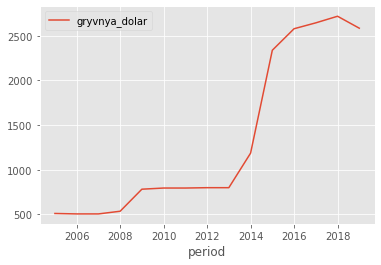

In [14]:
#Подивимося на залежність курсу долара від часу
Datatime = dt[['period','gryvnya_dolar']]
Datatime.set_index('period', inplace = True)

#графік залежності
plt.figure(figsize=(16,8))
Datatime.plot()
plt.show()

In [15]:
dt1 = pd.read_csv('Dolar.csv', sep=",", header = 0, index_col = False)
dt1.head()

,period,average course
0,Q1.2015,2339
1,Q2.2015,2339
2,Q3.2015,2339
3,Q4.2015,2339
4,Q1.2016,2565


In [16]:
# оцінки міри центральної тенденції та міри варіативності
dt1.describe()

,average course
count,28.000000
mean,2609.571429
std,148.420181
min,2339.000000
25%,2526.750000
50%,2644.500000
75%,2731.250000
max,2827.000000


array([[<AxesSubplot:title={'center':'average course'}>]], dtype=object)

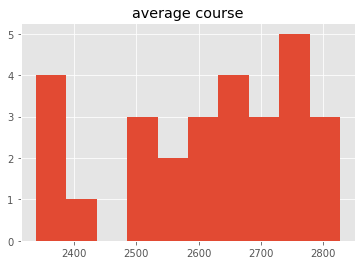

In [17]:
dt1.hist()

In [18]:
from scipy.stats.kde import gaussian_kde

from numpy import linspace,hstack
from pylab import plot,show,hist

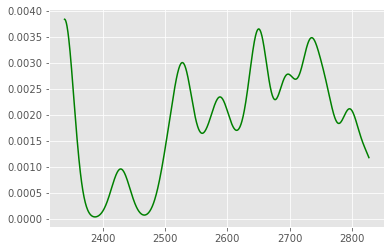

In [19]:
my_density = gaussian_kde(dt1['average course'], bw_method = 0.1)

#график
x = linspace(min(dt1['average course']), max(dt1['average course']), 1000)
plot(x, my_density(x), 'g')

# Авторегресія

In [20]:
dt2 = dt1[['period', 'average course']]

dt2.set_index('period', inplace = True)

<Figure size 1152x576 with 0 Axes>

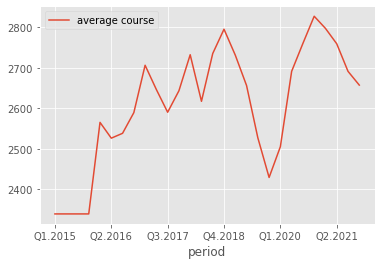

In [21]:
#графік залежності від часу
plt.figure(figsize=(16,8))
dt2.plot()
plt.show()

In [22]:
time_series = dt1['average course']

<AxesSubplot:>

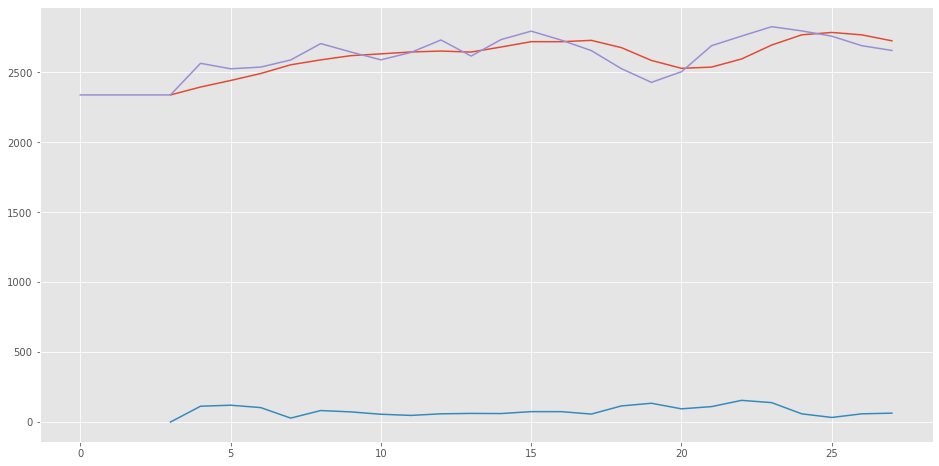

In [23]:
# виведемо на графік середне та середньоквадратичне відхилення
plt.figure(figsize=(16,8))
time_series.rolling(4).mean().plot()
time_series.rolling(4).std().plot()
time_series.plot()

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

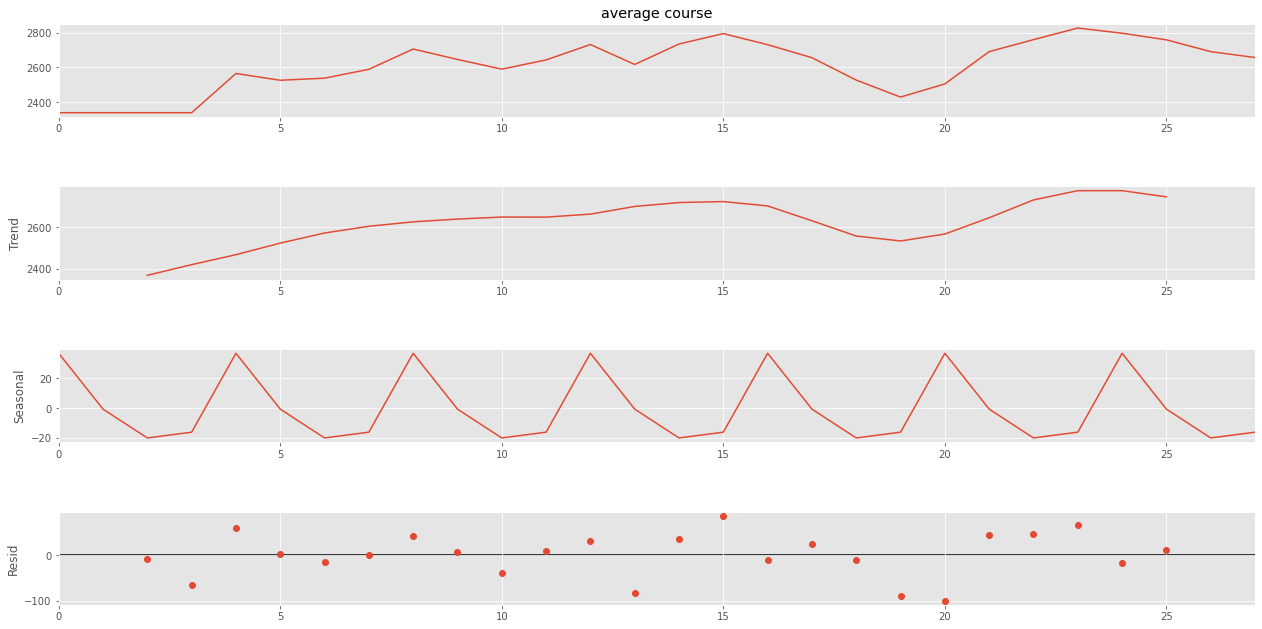

In [25]:
#графіки сезонності, тренд, данні 
decomp = seasonal_decompose(time_series, period = 4)
fig = decomp.plot()
fig.set_size_inches(20,10)

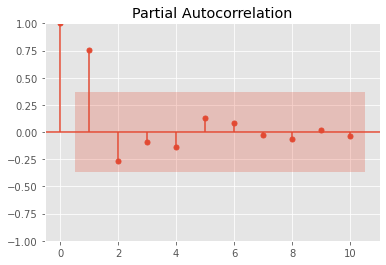

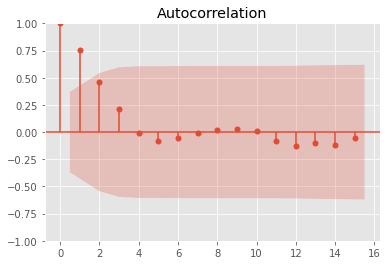

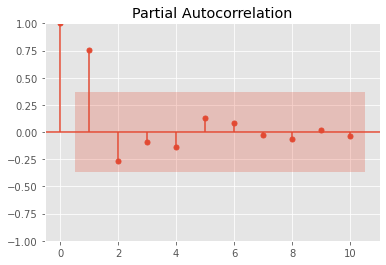

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(time_series)
plot_pacf(time_series,method = 'ywm', lags = 10)

In [27]:
# converting series to stationary
dt2_diff = dt2.diff(periods=1)

In [28]:
dt2_diff = dt2_diff[4:]
dt2_diff.head()

,average course
period,
Q1.2016,226.0
Q2.2016,-39.0
Q3.2016,12.0
Q4.2016,51.0
Q1.2017,117.0


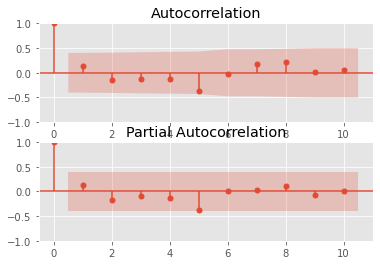

In [29]:
dt3 = dt2_diff
plt.figure()
plt.subplot(211)
plot_acf(dt3, lags=10, ax = plt.gca())
plt.subplot(212)

plot_pacf(dt3, method='ywmle', lags=10, ax = plt.gca())
plt.show()

<AxesSubplot:xlabel='period'>

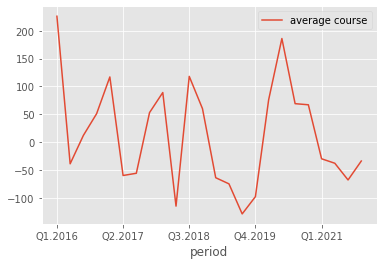

In [30]:
dt2_diff.plot()

In [31]:
#розділяєм на навчальну та тестову
X = dt1['average course'].values
train = X[0:21] # 20 data as train data
test = X[21:] # 8 data as test data
predictions = []

In [32]:
train

array([2339, 2339, 2339, 2339, 2565, 2526, 2538, 2589, 2706, 2646, 2590,
       2643, 2732, 2617, 2735, 2795, 2731, 2656, 2527, 2429, 2505],
      dtype=int64)

In [33]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

model_ar = AutoReg(train, lags = 6)
model_ar_fit = model_ar.fit()
#оцінка моделі
print(model_ar_fit.aic)

183.21141899553584


In [34]:
predictions = model_ar_fit.predict(start=21,end=29)
predictions

array([2682.87693217, 2817.60035295, 2861.4569108 , 2798.09649891,
       2629.31531047, 2463.10515515, 2428.46362687, 2541.4651269 ,
       2724.68378333])

In [35]:
test

array([2691, 2760, 2827, 2797, 2759, 2691, 2657], dtype=int64)

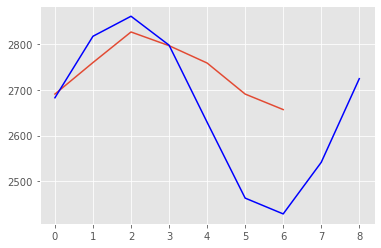

In [36]:
plt.plot(test)
plt.plot(predictions, color = 'blue')

<Figure size 1152x576 with 0 Axes>

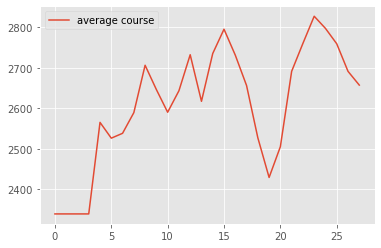

In [37]:
#графік залежності від часу
plt.figure(figsize=(16,8))
dt1.plot()
plt.show()

# Аріма

In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [39]:
#Оцінка моделі
model_arima = ARIMA(train,order=(2,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -117.939
Date:                Thu, 30 Dec 2021   AIC                            241.878
Time:                        00:19:58   BIC                            244.865
Sample:                             0   HQIC                           242.461
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0327      0.266     -0.123      0.902      -0.553       0.488
ar.L2         -0.1524      0.329     -0.463      0.644      -0.798       0.493
sigma2      7735.2884   2412.992      3.206      0.0

In [40]:
predictions = model_arima_fit.forecast(steps= 9, alpha = 0.05)
predictions

array([2517.44221436, 2505.45622956, 2503.9530567 , 2505.82834017,
       2505.99595507, 2505.70476708, 2505.68876397, 2505.73365055,
       2505.7346191 ])

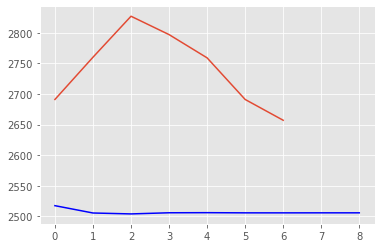

In [41]:
plt.plot(test)
plt.plot(predictions, color = 'blue')

In [42]:
#залишки
residuals = model_arima_fit.resid

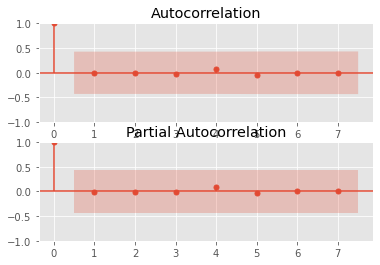

In [43]:
plt.figure()
plt.subplot(211)
plot_acf(residuals, lags=7, ax = plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=7, ax = plt.gca())
plt.show()

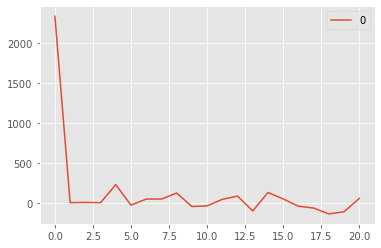

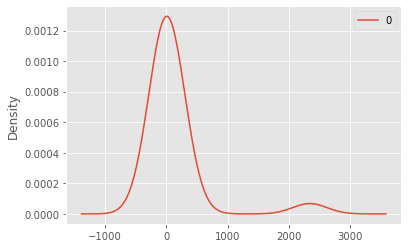

In [44]:
from pandas  import DataFrame
residuals = DataFrame(model_arima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind = 'kde')
plt.show()
